#UnsuperVised Learning - Clustering,Association Rule Mining

#K-Means Clustering

In [ ]:
import pandas as pd
data=pd.DataFrame({'x':[12,24,28,33,18,29,52,45,24,55,51,61,53,69,72,64,49,58],
                  'y':[36,39,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7]})
print(data)

     x   y
0   12  36
1   24  39
2   28  30
3   33  52
4   18  54
5   29  46
6   52  55
7   45  59
8   24  63
9   55  70
10  51  66
11  61  63
12  53  58
13  69  23
14  72  14
15  64   8
16  49  19
17  58   7


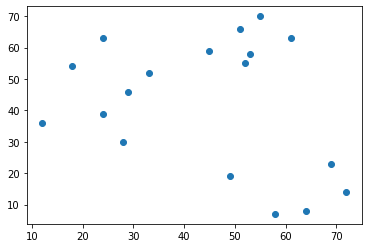

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data['x'] , data['y'])
plt.show()

In [ ]:
print(data['x'].min(),data['x'].max())
print(data['y'].min(),data['y'].max())

12 72
7 70


In [ ]:
import numpy as np
cent0 = [np.random.randint(12,72) , np.random.randint(7,70)]
cent1 = [np.random.randint(12,72) , np.random.randint(7,70)]
cent2 = [np.random.randint(12,72) , np.random.randint(7,70)]
print(cent0 , cent1 , cent2)

[40, 44] [29, 20] [68, 52]


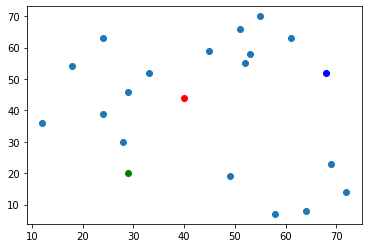

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data['x'] , data['y'])

plt.scatter(cent0[0],cent0[1],color='r')
plt.scatter(cent1[0],cent1[1],color='g')
plt.scatter(cent2[0],cent2[1],color='b')


plt.show()

In [ ]:
data['r'] = ((data['x'] - cent0[0])**2 + (data['y'] - cent0[1])**2)**0.5
data['g'] = ((data['x'] - cent1[0])**2 + (data['y'] - cent1[1])**2)**0.5
data['b'] = ((data['x'] - cent2[0])**2 + (data['y'] - cent2[1])**2)**0.5

In [ ]:
data.head()

,x,y,r,g,b,min
0,12,36,29.120440,23.345235,58.240879,r
1,24,39,16.763055,19.646883,45.880279,r
2,28,30,18.439089,10.049876,45.650849,r
3,33,52,10.630146,32.249031,35.000000,r
4,18,54,24.166092,35.735137,50.039984,r


In [ ]:
data['min'] = data.loc[:,'r':'b'].idxmin(axis=1)

In [ ]:
data.head()

,x,y,r,g,b,min
0,12,36,29.120440,23.345235,58.240879,g
1,24,39,16.763055,19.646883,45.880279,r
2,28,30,18.439089,10.049876,45.650849,g
3,33,52,10.630146,32.249031,35.000000,r
4,18,54,24.166092,35.735137,50.039984,r


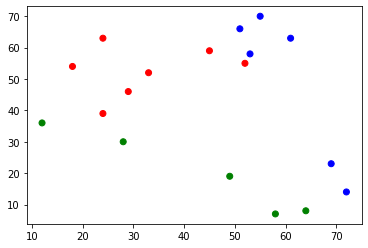

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data['x'] , data['y'],color=data['min'])

plt.show()

In [ ]:
cent0[0] = data[data['min'] == 'r']['x'].mean()
cent0[1] = data[data['min'] == 'r']['y'].mean()

cent1[0] = data[data['min'] == 'g']['x'].mean()
cent1[1] = data[data['min'] == 'g']['y'].mean()

cent2[0] = data[data['min'] == 'b']['x'].mean()
cent2[1] = data[data['min'] == 'b']['y'].mean()

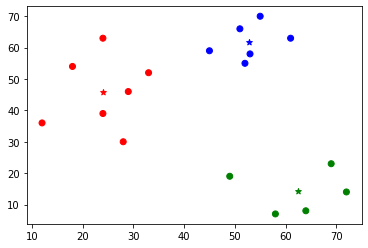

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data['x'] , data['y'],color=data['min'])

plt.scatter(cent0[0],cent0[1],marker='*',color='r')
plt.scatter(cent1[0],cent1[1],marker='*',color='g')
plt.scatter(cent2[0],cent2[1],marker='*',color='b')

plt.show()

In [ ]:
data['r'] = ((data['x'] - cent0[0])**2 + (data['y'] - cent0[1])**2)**0.5
data['g'] = ((data['x'] - cent1[0])**2 + (data['y'] - cent1[1])**2)**0.5
data['b'] = ((data['x'] - cent2[0])**2 + (data['y'] - cent2[1])**2)**0.5

data['min'] = data.loc[:,'r':'b'].idxmin(axis=1)

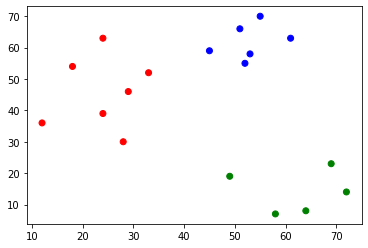

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data['x'] , data['y'],color=data['min'])

plt.show()

In [ ]:
print(cent0,cent1,cent2)

[24.0, 45.714285714285715] [62.4, 14.2] [52.833333333333336, 61.833333333333336]


In [ ]:
data

,x,y,r,g,b,min
0,12,36,15.439150,54.912658,48.318963,r
1,24,39,6.714286,45.712143,36.779372,r
2,28,30,16.215387,37.854986,40.373946,r
3,33,52,10.977714,47.887368,22.137198,r
4,18,54,10.230008,59.627175,35.703252,r
5,29,46,5.008157,46.117242,28.613322,r
6,52,55,29.499568,42.104632,6.883959,b
7,45,59,24.849753,48.060379,8.329999,b
8,24,63,17.285714,62.096699,28.856927,r
9,55,70,39.380146,56.288542,8.449195,b


In [ ]:
#Define centeroids
#Calculate distance of each points from defined centeroids
#Pick the label of centroid for each sample which is closest
#Calculate mean of each cluster formed to be assigned as new centeroid
#Repeat : - Calculate distance of each points from updated centeroids
#Repeat: - Pick the label of centroid for each sample which is closest
#Repeat: - Calculate mean of each cluster formed to be assigned as new centeroid

#K-Means Clustering Using Library

In [ ]:
df = pd.read_csv('/content/Call Center Data.csv')
df.head()

,Experience in months,Call Attended in a day
0,12,30
1,24,35
2,60,45
3,72,50
4,84,50


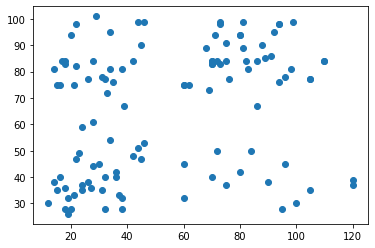

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Experience in months'],df['Call Attended in a day'])
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmodel = KMeans(4)

In [ ]:
kmodel.fit(df)

KMeans(n_clusters=4)

In [ ]:
df['target'] = kmodel.predict(df)

In [ ]:
print(kmodel.cluster_centers_)

[[82.33333333 85.41025641]
 [27.84848485 39.63636364]
 [28.76       83.68      ]
 [87.64285714 39.14285714]]


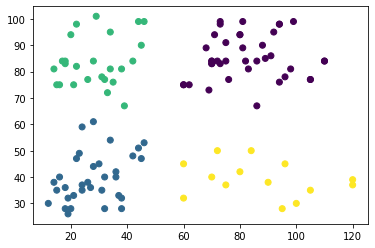

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Experience in months'],df['Call Attended in a day'],c = df['target'])
plt.show()

In [ ]:
df.head()

,Experience in months,Call Attended in a day,target
0,12,30,1
1,24,35,1
2,60,45,3
3,72,50,3
4,84,50,3


In [ ]:
df[df['target'] == 3]

,Experience in months,Call Attended in a day,target
2,60,45,3
3,72,50,3
4,84,50,3
7,96,45,3
41,60,32,3
42,120,37,3
43,120,39,3
47,80,42,3
48,75,37,3
49,70,40,3


#Mall Data for clustering

In [ ]:
df = pd.read_csv('/content/mall.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df = df[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [ ]:
#Form cluster using features - Age,Annual Income (k$),Spending Score (1-100) and show the significance of ach cluster

#Knee rule to decide number of possible clusters

In [ ]:
from sklearn.cluster import KMeans
losses = []

for i in range(1,12):
  kmodel = KMeans(n_clusters=i)

  kmodel.fit(df)
  losses.append(kmodel.inertia_)

In [ ]:
print(losses)

[308812.78, 212840.1698209719, 143342.751571706, 104366.15145556197, 75350.77917248776, 58300.44332159069, 51084.505954934364, 44310.50582506423, 40809.751227205954, 37074.79840267401, 34782.594517838486]


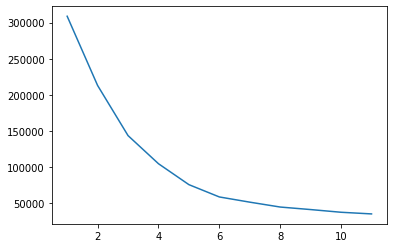

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,12) , losses)
plt.show()

In [ ]:
kmodel = KMeans(n_clusters=6)
kmodel.fit(df)
df['target'] = kmodel.predict(df)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),target
0,19,15,39,4
1,21,15,81,5
2,20,16,6,4
3,23,16,77,5
4,31,17,40,4


In [ ]:
df['target'].unique()

array([4, 5, 0, 2, 1, 3], dtype=int32)

In [ ]:
kmodel.cluster_centers_

array([[56.34090909, 53.70454545, 49.38636364],
       [32.69230769, 86.53846154, 82.12820513],
       [27.        , 56.65789474, 49.13157895],
       [41.68571429, 88.22857143, 17.28571429],
       [44.31818182, 25.77272727, 20.27272727],
       [25.27272727, 25.72727273, 79.36363636]])

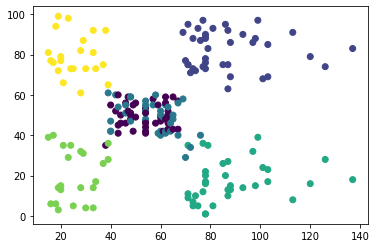

In [ ]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=df['target'])
plt.show()

In [ ]:
df[df['target'] == 4]

,Age,Annual Income (k$),Spending Score (1-100),target
1,21,15,81,4
3,23,16,77,4
5,22,17,76,4
7,23,18,94,4
9,30,19,72,4
11,35,19,99,4
13,24,20,77,4
15,22,20,79,4
17,20,21,66,4
19,35,23,98,4


#Data Link for Clustering Assinment : - https://www.kaggle.com/imakash3011/customer-personality-analysis

#Association Rule Mining - Recommendation System

In [ ]:
dataset = [['Milk','Onion','Nutmeg','Kidney Beans','Eggs','Yogurt'],
           ['Dill','Onion','Nutmeg','Kidney Beans','Eggs','Yogurt'],
           ['Milk','Apple','Kidney Beans','Eggs'],
           ['Milk','Unicorn','Corn','Kidney Beans','Yogurt'],
           ['Corn','Onion','Onion','Kidney Beans','Eggs','Ice cream']]

In [ ]:
print(dataset)

[['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'], ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'], ['Milk', 'Apple', 'Kidney Beans', 'Eggs'], ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'], ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Eggs', 'Ice cream']]


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)

In [ ]:
te.columns_

['Apple',
 'Corn',
 'Dill',
 'Eggs',
 'Ice cream',
 'Kidney Beans',
 'Milk',
 'Nutmeg',
 'Onion',
 'Unicorn',
 'Yogurt']

In [ ]:
df = pd.DataFrame(te_ary,columns = te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [ ]:
from mlxtend.frequent_patterns import apriori
frequent_items = apriori(df,use_colnames=True,min_support=0.5)
frequent_items

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Yogurt, Kidney Beans)"


In [ ]:
frequent_items.head(10)

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Yogurt, Kidney Beans)"


In [ ]:
from mlxtend.frequent_patterns import association_rules
res = association_rules(frequent_items,metric='confidence',min_threshold=0.6)
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,0.00,inf
1,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,0.00,1.0
2,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
3,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
4,(Milk),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
5,(Kidney Beans),(Milk),1.0,0.6,0.6,0.60,1.00,0.00,1.0
6,(Kidney Beans),(Onion),1.0,0.6,0.6,0.60,1.00,0.00,1.0
7,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
8,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
9,(Kidney Beans),(Yogurt),1.0,0.6,0.6,0.60,1.00,0.00,1.0


In [ ]:
res[['antecedents' ,	'consequents' , 'support' , 'confidence' , 'lift']]

,antecedents,consequents,support,confidence,lift
0,(Eggs),(Kidney Beans),0.8,1.00,1.00
1,(Kidney Beans),(Eggs),0.8,0.80,1.00
2,(Eggs),(Onion),0.6,0.75,1.25
3,(Onion),(Eggs),0.6,1.00,1.25
4,(Milk),(Kidney Beans),0.6,1.00,1.00
5,(Kidney Beans),(Milk),0.6,0.60,1.00
6,(Kidney Beans),(Onion),0.6,0.60,1.00
7,(Onion),(Kidney Beans),0.6,1.00,1.00
8,(Yogurt),(Kidney Beans),0.6,1.00,1.00
9,(Kidney Beans),(Yogurt),0.6,0.60,1.00


#Association and Recommendation for chiporders data

In [ ]:
df = pd.read_csv('http://bit.ly/chiporders',sep='\t')
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [ ]:
df['item_name'] = df['item_name'].str.lower()
df['item_name'] = df['item_name'].str.strip()

In [ ]:
df = df.groupby(['order_id','item_name'])['quantity'].sum().unstack().fillna(0)
df.head()

item_name,6 pack soft drink,barbacoa bowl,barbacoa burrito,barbacoa crispy tacos,barbacoa salad bowl,barbacoa soft tacos,bottled water,bowl,burrito,canned soda,canned soft drink,carnitas bowl,carnitas burrito,carnitas crispy tacos,carnitas salad,carnitas salad bowl,carnitas soft tacos,chicken bowl,chicken burrito,chicken crispy tacos,chicken salad,chicken salad bowl,chicken soft tacos,chips,chips and fresh tomato salsa,chips and guacamole,chips and mild fresh tomato salsa,chips and roasted chili corn salsa,chips and roasted chili-corn salsa,chips and tomatillo green chili salsa,chips and tomatillo red chili salsa,chips and tomatillo-green chili salsa,chips and tomatillo-red chili salsa,crispy tacos,izze,nantucket nectar,salad,side of chips,steak bowl,steak burrito,steak crispy tacos,steak salad,steak salad bowl,steak soft tacos,veggie bowl,veggie burrito,veggie crispy tacos,veggie salad,veggie salad bowl,veggie soft tacos
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def replace_non_zero(x):
  return x > 0

In [ ]:
df1 = df.applymap(replace_non_zero)
df1.head()

item_name,6 pack soft drink,barbacoa bowl,barbacoa burrito,barbacoa crispy tacos,barbacoa salad bowl,barbacoa soft tacos,bottled water,bowl,burrito,canned soda,canned soft drink,carnitas bowl,carnitas burrito,carnitas crispy tacos,carnitas salad,carnitas salad bowl,carnitas soft tacos,chicken bowl,chicken burrito,chicken crispy tacos,chicken salad,chicken salad bowl,chicken soft tacos,chips,chips and fresh tomato salsa,chips and guacamole,chips and mild fresh tomato salsa,chips and roasted chili corn salsa,chips and roasted chili-corn salsa,chips and tomatillo green chili salsa,chips and tomatillo red chili salsa,chips and tomatillo-green chili salsa,chips and tomatillo-red chili salsa,crispy tacos,izze,nantucket nectar,salad,side of chips,steak bowl,steak burrito,steak crispy tacos,steak salad,steak salad bowl,steak soft tacos,veggie bowl,veggie burrito,veggie crispy tacos,veggie salad,veggie salad bowl,veggie soft tacos
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [ ]:
from mlxtend.frequent_patterns import apriori,association_rules

In [ ]:
frequent_itemsets = apriori(df1,use_colnames=True,min_support=0.04)
frequent_itemsets

,support,itemsets
0,0.047983,(barbacoa burrito)
1,0.083969,(bottled water)
2,0.051254,(canned soda)
3,0.150491,(canned soft drink)
4,0.335333,(chicken bowl)
5,0.266630,(chicken burrito)
6,0.053435,(chicken salad bowl)
7,0.058342,(chicken soft tacos)
8,0.113413,(chips)
9,0.059978,(chips and fresh tomato salsa)


In [ ]:
rules1 = association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chicken bowl),(canned soft drink),0.335333,0.150491,0.060523,0.180488,1.199328,0.010059,1.036604
1,(canned soft drink),(chicken bowl),0.150491,0.335333,0.060523,0.402174,1.199328,0.010059,1.111807
2,(chicken bowl),(chips),0.335333,0.113413,0.066521,0.198374,1.749124,0.028490,1.105985
3,(chips),(chicken bowl),0.113413,0.335333,0.066521,0.586538,1.749124,0.028490,1.607568


In [ ]:
rules2 = association_rules(frequent_itemsets,metric='confidence',min_threshold=0.3)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(canned soft drink),(chicken bowl),0.150491,0.335333,0.060523,0.402174,1.199328,0.010059,1.111807
1,(chips),(chicken bowl),0.113413,0.335333,0.066521,0.586538,1.749124,0.028490,1.607568
2,(chips and guacamole),(chicken bowl),0.258451,0.335333,0.081243,0.314346,0.937416,-0.005424,0.969392
